In [1]:
# Local Intrinsic Dimensionality
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
tweb_data = np.loadtxt('../data/TCW/tcw_web/web_type_tweb.txt')
data_pos = np.loadtxt('../data/TCW/pos/fof_catalog_200Mpc512_xyz.dat')
data_pos = data_pos[:,0:3]

random_pos = np.loadtxt('../data/TCW/pos/random_000_fof_catalog_200Mpc512_xyz.dat')
random_pos = random_pos[:,0:3]

pairs_data = np.loadtxt('../data/TCW/web/fof_catalog_200Mpc512_xyz_random_000_fof_catalog_200Mpc512_xyz_pairs.dat') # only connections data data
pairs_random = np.loadtxt('../data/TCW/web/random_000_fof_catalog_200Mpc512_xyz_fof_catalog_200Mpc512_xyz_pairs.dat') #only connections random random

all_points = np.vstack([data_pos, random_pos])

In [3]:
astra_counts = np.loadtxt('../data/TCW/web/fof_catalog_200Mpc512_xyz_random_000_fof_catalog_200Mpc512_xyz_nconnections.dat')

n_d = astra_counts[:,0]
n_r = astra_counts[:,1]

r = (n_d-n_r)/(n_d+n_r)

n_d_norm = (n_d-n_d.mean())/n_d.std()
n_r_norm = (n_r-n_r.mean())/n_r.std()

r_norm = n_d_norm - n_r_norm

r_norm_bis = (n_d-n_r)
r_norm_bis = (r_norm_bis - r_norm_bis.mean())/r_norm_bis.std()

In [4]:
n_data = len(data_pos)
n_random = len(random_pos)
    
print("n_data {} ".format(n_data))
print("n_random {} ".format(n_random))

n_data 281465 
n_random 281465 


In [5]:
print(np.shape(all_points))

(562930, 3)


In [6]:
pairs_data_distances = data_pos[np.int_(pairs_data[:,0]),:] - data_pos[np.int_(pairs_data[:,1]),:]
pairs_data_distances = np.sqrt(np.sum(pairs_data_distances**2, axis=1))

pairs_random_distances = random_pos[np.int_(pairs_random[:,0]),:] - random_pos[np.int_(pairs_random[:,1]),:]
pairs_random_distances = np.sqrt(np.sum(pairs_random_distances**2, axis=1))

In [7]:
pairs_random[:,1]

array([ 19259.,  81331.,  83551., ..., 281171., 281312., 281431.])

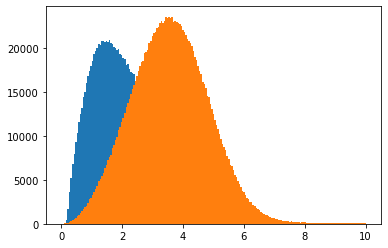

In [8]:
_=plt.hist(pairs_data_distances, bins=np.linspace(0,10,200))
_=plt.hist(pairs_random_distances, bins=np.linspace(0,10,200))

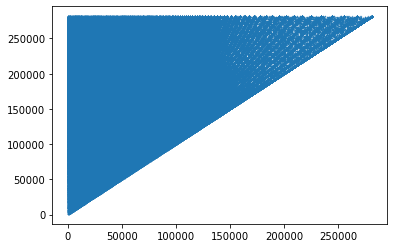

In [32]:
plt.scatter(pairs_data[:,0], pairs_data[:,1], s=0.1)

In [40]:
n_points= n_data
n_neigh = np.zeros(n_points)
lid_values = np.zeros(n_points)
lid_values_error = np.zeros(n_points)
for point_id in range(n_points):
    ii_point_id = pairs_data[:,0]==point_id
    d_1 = pairs_data_distances[ii_point_id]
    
    ii_point_id = pairs_data[:,1]==point_id
    d_2 = pairs_data_distances[ii_point_id]
    
    #print(d_1,d_2)
    if len(d_2):
        d_point_id = np.concatenate([d_1,d_2])
    else:
        d_point_id = d_1.copy()
    d_point_id = np.sort(d_point_id)
    #print(d_point_id)
    n_in = len(d_point_id)
    n_neigh[point_id] = n_in
    if n_in > 2:
        log_n = np.log(1+np.arange(n_in))
        log_d = np.log(d_point_id)
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(log_d, log_n)
        #print(n_in, slope)
        lid_values[point_id] = slope
        lid_values_error[point_id] = std_err
        
    if (point_id%10000)==0:
        print(point_id,n_points)

0 281465
10000 281465
20000 281465
30000 281465
40000 281465
50000 281465
60000 281465
70000 281465
80000 281465
90000 281465
100000 281465
110000 281465
120000 281465
130000 281465
140000 281465
150000 281465
160000 281465
170000 281465
180000 281465
190000 281465
200000 281465
210000 281465
220000 281465
230000 281465
240000 281465
250000 281465
260000 281465
270000 281465
280000 281465


In [39]:
np.concatenate([d_1,d_2])

array([1.04726888, 1.46965178, 1.71588972, 0.84700051, 0.74096406,
       1.33978298, 0.90259243, 3.44569549, 0.64215927, 0.83477785,
       1.35029529])

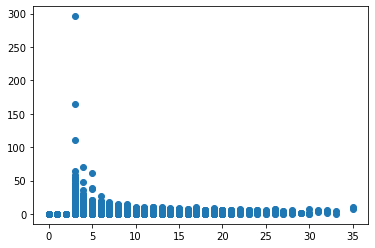

In [42]:
plt.scatter(n_neigh, lid_values)

8.0


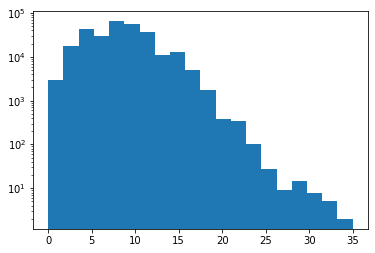

In [43]:
_=plt.hist(n_neigh, bins=20, log=True)
print(np.median(n_neigh))

8.0 5.0 14.0


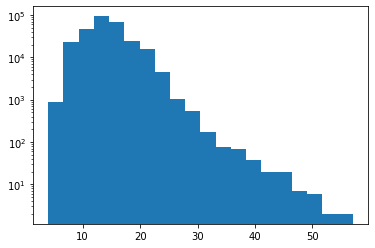

In [69]:
#_=plt.hist(n_d, bins=20, log=True)
#_=plt.hist(n_r, bins=20, log=True)
_=plt.hist(n_d+n_r, bins=20, log=True)
print(np.median(n_d), np.median(n_r), np.median(n_d+n_r))

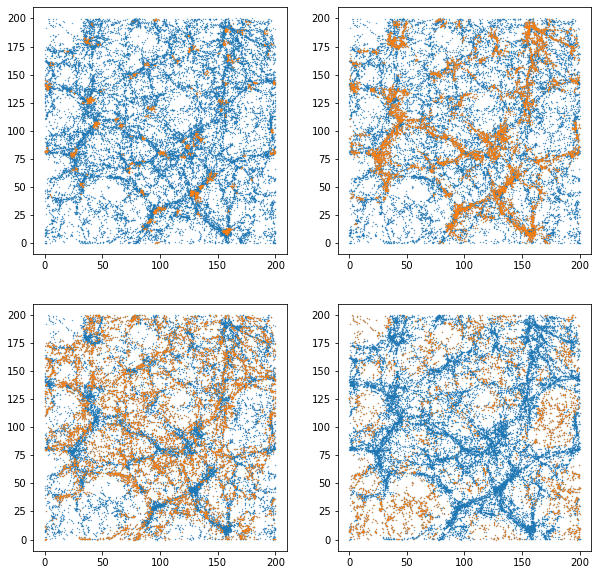

In [44]:
is_filament = tweb_data==2
is_sheet = tweb_data==1
is_knot = tweb_data==3
is_void = tweb_data==0

tcw_pos = data_pos.copy()
is_slice = (tcw_pos[:,2]>100) & ((tcw_pos[:,2]<120))

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.scatter(tcw_pos[is_slice,0], tcw_pos[is_slice,1], s=0.1)
plt.scatter(tcw_pos[is_slice&is_knot,0], tcw_pos[is_slice&is_knot,1], s=0.1)

plt.subplot(2,2,2)
plt.scatter(tcw_pos[is_slice,0], tcw_pos[is_slice,1], s=0.1)
plt.scatter(tcw_pos[is_slice&is_filament,0], tcw_pos[is_slice&is_filament,1], s=0.1)

plt.subplot(2,2,3)
plt.scatter(tcw_pos[is_slice,0], tcw_pos[is_slice,1], s=0.1)
plt.scatter(tcw_pos[is_slice&is_sheet,0], tcw_pos[is_slice&is_sheet,1], s=0.1)

plt.subplot(2,2,4)
plt.scatter(tcw_pos[is_slice,0], tcw_pos[is_slice,1], s=0.1)
plt.scatter(tcw_pos[is_slice&is_void,0], tcw_pos[is_slice&is_void,1], s=0.1)

(array([5.14505730e-02, 6.10266297e-01, 6.00175211e-01, 3.17834300e-01,
        1.56062664e-01, 7.94018344e-02, 4.14642385e-02, 2.29930114e-02,
        1.38970669e-02, 8.31030632e-03, 5.55184330e-03, 3.31713908e-03,
        2.35691461e-03, 1.74586267e-03, 1.46652465e-03, 1.04751760e-03,
        8.55472710e-04, 5.93593309e-04, 4.01548415e-04]),
 array([ 0.1       ,  0.62105263,  1.14210526,  1.66315789,  2.18421053,
         2.70526316,  3.22631579,  3.74736842,  4.26842105,  4.78947368,
         5.31052632,  5.83157895,  6.35263158,  6.87368421,  7.39473684,
         7.91578947,  8.43684211,  8.95789474,  9.47894737, 10.        ]),
 <BarContainer object of 19 artists>)

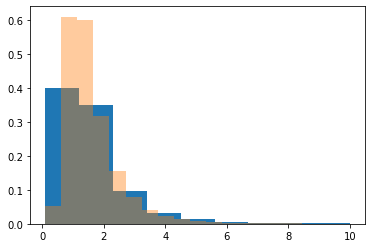

In [65]:
is_filament = tweb_data==2
is_sheet = tweb_data==1
is_knot = tweb_data==3
is_void = tweb_data==0

plt.hist(lid_values[is_void], bins=np.linspace(0.1,10,10), density=True)
plt.hist(lid_values[is_sheet], alpha=0.4, bins=np.linspace(0.1,10,20), density=True)
#plt.hist(lid_values[is_filament], alpha=0.5, bins=np.linspace(0.1,10,20), density=True)
#plt.hist(lid_values[is_knot], alpha=0.5, bins=np.linspace(0.1,10,20), density=True, log=True)

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 4.000e+00,
        3.700e+01, 1.440e+02, 5.400e+02, 1.629e+03, 6.014e+03, 6.827e+03,
        4.616e+03, 1.739e+03, 4.020e+02, 8.800e+01, 1.800e+01, 9.000e+00,
        4.000e+00]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <BarContainer object of 19 artists>)

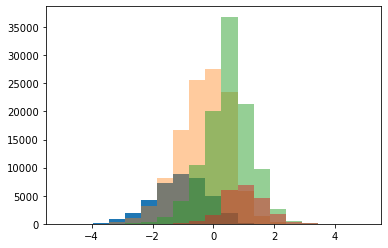

In [66]:
is_filament = tweb_data==2
is_sheet = tweb_data==1
is_knot = tweb_data==3
is_void = tweb_data==0

plt.hist(r_norm_bis[is_void], bins=np.linspace(-5,5,20))
plt.hist(r_norm_bis[is_sheet], alpha=0.4, bins=np.linspace(-5,5,20))
plt.hist(r_norm_bis[is_filament], alpha=0.5, bins=np.linspace(-5,5,20))
plt.hist(r_norm_bis[is_knot], alpha=0.5, bins=np.linspace(-5,5,20))

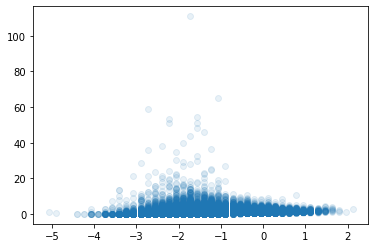

In [48]:
plt.scatter(r_norm_bis[is_void], lid_values[is_void], alpha=0.1)

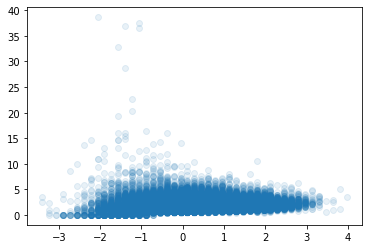

In [49]:
plt.scatter(r_norm_bis[is_filament], lid_values[is_filament], alpha=0.1)

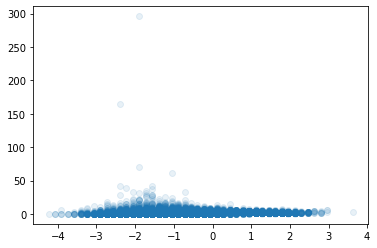

In [50]:
plt.scatter(r_norm_bis[is_sheet], lid_values[is_sheet], alpha=0.1)

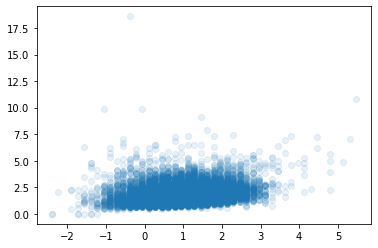

In [51]:
plt.scatter(r_norm_bis[is_knot], lid_values[is_knot], alpha=0.1)

In [10]:
astra_data = np.loadtxt('../data/TCW/parameter_search/web-95_80_random_000_fof_catalog_200Mpc512_xyz.csv')
tcw_pos = np.loadtxt('../data/TCW/pos/fof_catalog_200Mpc512_xyz.dat')

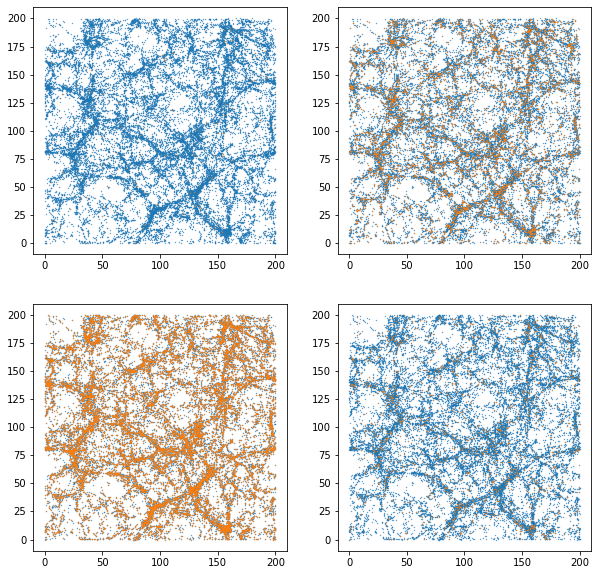

In [11]:
is_filament = astra_data==2
is_sheet = astra_data==1
is_knot = astra_data==3
is_void = astra_data==0

is_slice = (tcw_pos[:,2]>100) & ((tcw_pos[:,2]<120))

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.scatter(tcw_pos[is_slice,0], tcw_pos[is_slice,1], s=0.1)
plt.scatter(tcw_pos[is_slice&is_knot,0], tcw_pos[is_slice&is_knot,1], s=0.1)

plt.subplot(2,2,2)
plt.scatter(tcw_pos[is_slice,0], tcw_pos[is_slice,1], s=0.1)
plt.scatter(tcw_pos[is_slice&is_filament,0], tcw_pos[is_slice&is_filament,1], s=0.1)

plt.subplot(2,2,3)
plt.scatter(tcw_pos[is_slice,0], tcw_pos[is_slice,1], s=0.1)
plt.scatter(tcw_pos[is_slice&is_sheet,0], tcw_pos[is_slice&is_sheet,1], s=0.1)

plt.subplot(2,2,4)
plt.scatter(tcw_pos[is_slice,0], tcw_pos[is_slice,1], s=0.1)
plt.scatter(tcw_pos[is_slice&is_void,0], tcw_pos[is_slice&is_void,1], s=0.1)

(array([2.0000e+00, 1.9000e+01, 8.3000e+01, 5.8700e+02, 2.0260e+03,
        5.8150e+03, 2.0162e+04, 2.9882e+04, 4.4703e+04, 5.4164e+04,
        5.2702e+04, 4.0533e+04, 2.1454e+04, 8.1600e+03, 9.6100e+02,
        1.6900e+02, 2.6000e+01, 8.0000e+00, 6.0000e+00, 3.0000e+00]),
 array([-5.07695049, -4.54950738, -4.02206427, -3.49462116, -2.96717805,
        -2.43973494, -1.91229183, -1.38484872, -0.85740561, -0.3299625 ,
         0.19748061,  0.72492372,  1.25236683,  1.77980994,  2.30725305,
         2.83469616,  3.36213927,  3.88958238,  4.41702549,  4.9444686 ,
         5.47191171]),
 <BarContainer object of 20 artists>)

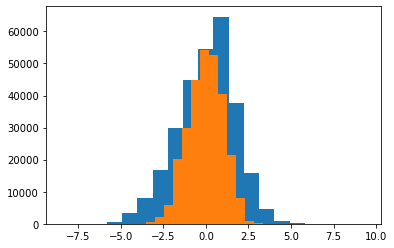

In [22]:
plt.hist(r_norm, bins=20)
plt.hist(r_norm_bis, bins=20)

In [9]:
is_filament = tweb_data==2
is_sheet = tweb_data==1
is_knot = tweb_data==3
is_void = tweb_data==0

-1.7960641467867182 1.4120519335006398
-0.5175906247466282 1.3796195470516832
0.8284369745884137 1.3237776738250522
1.769429247565177 1.1855809723331072
1.0097777496457466e-17 1.6964060223696118


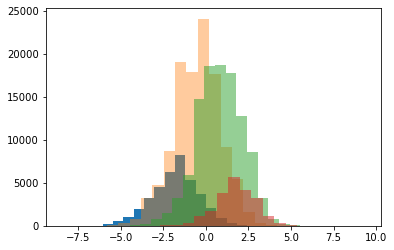

In [19]:
plt.hist(r_norm[is_void], bins=20)
plt.hist(r_norm[is_sheet], alpha=0.4, bins=20)
plt.hist(r_norm[is_filament], alpha=0.5, bins=20)
plt.hist(r_norm[is_knot], alpha=0.5, bins=20)
print(r_norm[is_void].mean(), r_norm[is_void].std())
print(r_norm[is_sheet].mean(), r_norm[is_sheet].std())
print(r_norm[is_filament].mean(), r_norm[is_filament].std())
print(r_norm[is_knot].mean(), r_norm[is_knot].std())
print(r_norm.mean(), r_norm.std())

-1.0588298245812462 0.8354122298429117
-0.3051085985264974 0.814064701505067
0.488375715473305 0.7788388405093332
1.0430503578106767 0.6955704765288709
1.0097777496457466e-17 1.6964060223696118


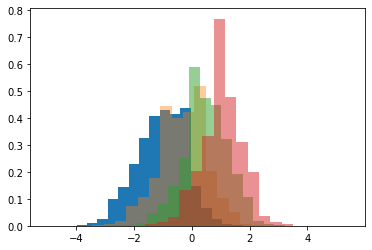

In [29]:
plt.hist(r_norm_bis[is_void], bins=20, density=True)
plt.hist(r_norm_bis[is_sheet], alpha=0.4, bins=20, density=True)
plt.hist(r_norm_bis[is_filament], alpha=0.5, bins=20, density=True)
plt.hist(r_norm_bis[is_knot], alpha=0.5, bins=20, density=True)
print(r_norm_bis[is_void].mean(), r_norm_bis[is_void].std())
print(r_norm_bis[is_sheet].mean(), r_norm_bis[is_sheet].std())
print(r_norm_bis[is_filament].mean(), r_norm_bis[is_filament].std())
print(r_norm_bis[is_knot].mean(), r_norm_bis[is_knot].std())
print(r_norm.mean(), r_norm.std()) 

(array([3.490e+02, 3.614e+03, 8.452e+03, 7.708e+03, 1.521e+03, 3.230e+02,
        8.400e+01, 1.500e+01, 5.000e+00, 5.000e+00]),
 array([-1.79735826, -0.84420476,  0.10894875,  1.06210225,  2.01525575,
         2.96840926,  3.92156276,  4.87471626,  5.82786977,  6.78102327,
         7.73417677]),
 <BarContainer object of 10 artists>)

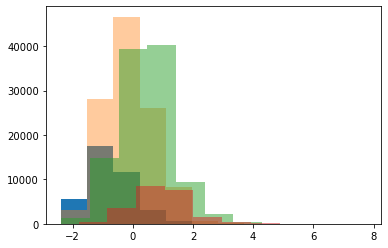

In [150]:
plt.hist((n_d[is_void]- n_d.mean())/n_d.std())
plt.hist((n_d[is_sheet]- n_d.mean())/n_d.std(), alpha=0.4)
plt.hist((n_d[is_filament]- n_d.mean())/n_d.std(), alpha=0.5)
plt.hist((n_d[is_knot]- n_d.mean())/n_d.std(), alpha=0.5)

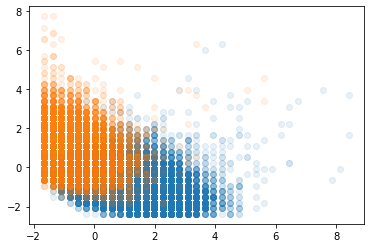

In [156]:
plt.scatter(n_r_norm[is_void], n_d_norm[is_void], alpha=0.1)
plt.scatter(n_r_norm[is_knot], n_d_norm[is_knot], alpha=0.1)

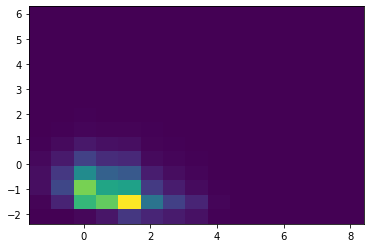

In [173]:
#_ =plt.hist2d(n_r_norm[is_void], n_d_norm[is_void])
_= plt.hist2d(n_r_norm[is_void], n_d_norm[is_void], bins=15)

-0.4169610710088528
0.4114759035795608


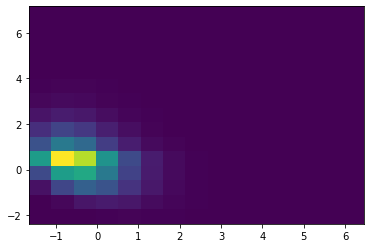

In [176]:
_= plt.hist2d(n_r_norm[is_filament], n_d_norm[is_filament], bins=15)
print(n_r_norm[is_filament].mean())
print(n_d_norm[is_filament].mean())

0.25955092712287736
-0.2580396976237508
0.9038608618393145
0.8403446001236616


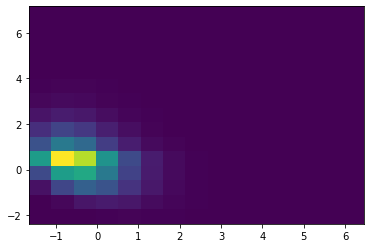

In [180]:
_= plt.hist2d(n_r_norm[is_filament], n_d_norm[is_filament], bins=15)
print(n_r_norm[is_sheet].mean())
print(n_d_norm[is_sheet].mean())
print(n_r_norm[is_sheet].std())
print(n_d_norm[is_sheet].std())

-0.4169610710088528
0.4114759035795608
0.7828852752947687
0.9059772603192141


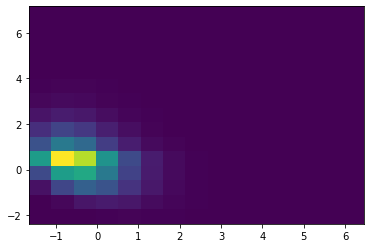

In [181]:
_= plt.hist2d(n_r_norm[is_filament], n_d_norm[is_filament], bins=15)
print(n_r_norm[is_filament].mean())
print(n_d_norm[is_filament].mean())
print(n_r_norm[is_filament].std())
print(n_d_norm[is_filament].std())

-0.8877948520363226
0.8816343955288544
0.6418797494956393
0.9045215465358609


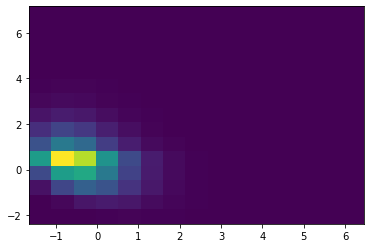

In [184]:
_= plt.hist2d(n_r_norm[is_filament], n_d_norm[is_filament], bins=15)
print(n_r_norm[is_knot].mean())
print(n_d_norm[is_knot].mean())
print(n_r_norm[is_knot].std())
print(n_d_norm[is_knot].std())

0.9051973903021653
-0.8908667564845526
0.9987254415834261
0.7478806958977399


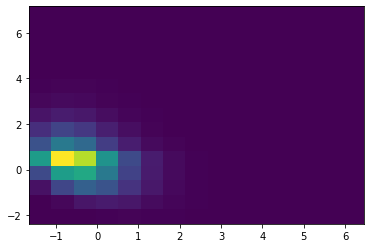

In [185]:
_= plt.hist2d(n_r_norm[is_filament], n_d_norm[is_filament], bins=15)
print(n_r_norm[is_void].mean())
print(n_d_norm[is_void].mean())
print(n_r_norm[is_void].std())
print(n_d_norm[is_void].std())

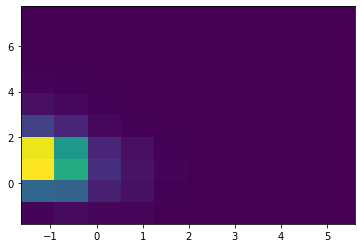

In [167]:
_= plt.hist2d(n_r_norm[is_], n_d_norm[is_knot])

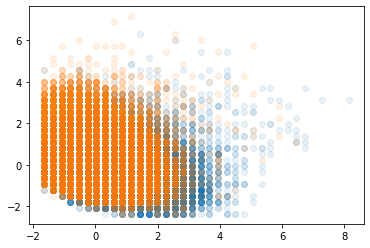

In [157]:
plt.scatter(n_r_norm[is_sheet], n_d_norm[is_sheet], alpha=0.1)
plt.scatter(n_r_norm[is_filament], n_d_norm[is_filament], alpha=0.1)

(array([1.1927e+04, 7.5760e+03, 1.7380e+03, 6.9600e+02, 1.1400e+02,
        1.0000e+01, 1.1000e+01, 1.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([-1.64937311, -0.92280089, -0.19622868,  0.53034354,  1.25691575,
         1.98348797,  2.71006019,  3.4366324 ,  4.16320462,  4.88977684,
         5.61634905]),
 <BarContainer object of 10 artists>)

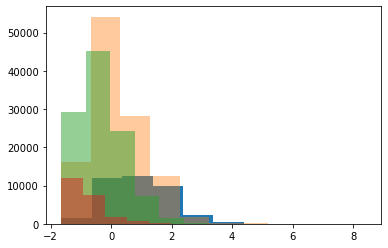

In [149]:
plt.hist((n_r[is_void]- n_r.mean())/n_r.std())
plt.hist((n_r[is_sheet]- n_r.mean())/n_r.std(), alpha=0.4)
plt.hist((n_r[is_filament]- n_r.mean())/n_r.std(), alpha=0.5)
plt.hist((n_r[is_knot]- n_r.mean())/n_r.std(), alpha=0.5)

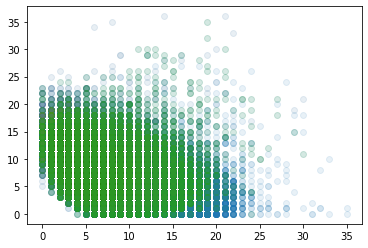

In [53]:
plt.scatter(n_d, n_r, alpha=0.1)
plt.scatter(n_d[is_void], n_r[is_void], alpha=0.01)
plt.scatter(n_d[is_sheet], n_r[is_sheet], alpha=0.1)

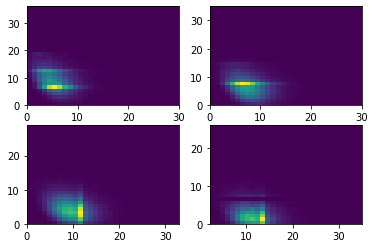

In [69]:
plt.subplot(2,2,1)
_= plt.hist2d(n_d[is_void], n_r[is_void], bins=30)

plt.subplot(2,2,2)
_= plt.hist2d(n_d[is_sheet], n_r[is_sheet], bins=30)

plt.subplot(2,2,3)
_= plt.hist2d(n_d[is_filament], n_r[is_filament], bins=30)

plt.subplot(2,2,4)
_= plt.hist2d(n_d[is_knot], n_r[is_knot], bins=30)

(0.0, 30.0)

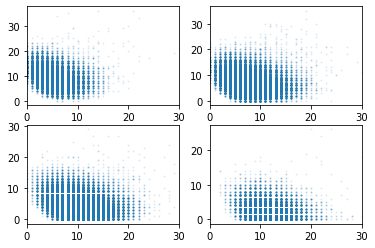

In [79]:
plt.subplot(2,2,1)
_= plt.scatter(n_d[is_void], n_r[is_void], alpha=0.1, s=1)
plt.xlim(0,30)

plt.subplot(2,2,2)
_= plt.scatter(n_d[is_sheet], n_r[is_sheet], alpha=0.1, s=1)
plt.xlim(0,30)

plt.subplot(2,2,3)
_= plt.scatter(n_d[is_filament], n_r[is_filament], alpha=0.1, s=1)
plt.xlim(0,30)

plt.subplot(2,2,4)
_= plt.scatter(n_d[is_knot], n_r[is_knot], alpha=0.1, s=1)
plt.xlim(0,30)

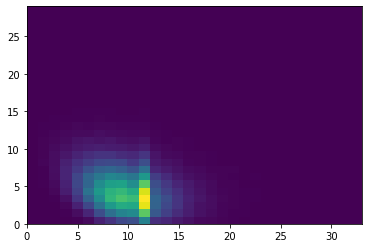

In [57]:
_= plt.hist2d(n_d[is_filament], n_r[is_filament], bins=30)

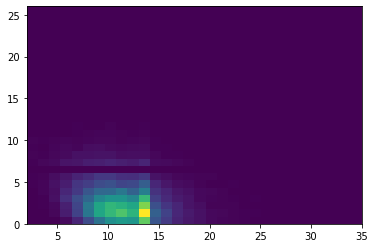

In [63]:
_= plt.hist2d(n_d[is_knot], n_r[is_knot], bins=30)

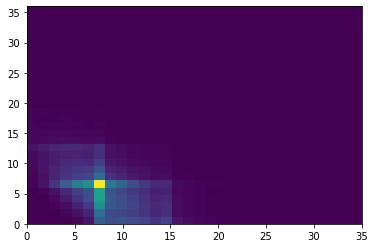

In [61]:
_= plt.hist2d(n_d, n_r, bins=30)

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

clf = DecisionTreeClassifier(random_state=0)
clf = RandomForestClassifier(max_depth=5, random_state=0)

In [135]:
rand_values = np.random.random(size=len(tweb_data))
is_train = rand_values < 0.3
for i in range(4):
    print(np.count_nonzero(tweb_data[is_train]==i))

11477
33915
32184
6642


In [136]:
tweb_data_train = tweb_data[is_train]
n_d_train = n_d[is_train]
n_r_train = n_r[is_train]
r_train = r[is_train]

In [137]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

In [142]:
X = np.array([n_d_train, r_train])
Y = tweb_data_train
cross_val_score(clf, X.T, Y, cv=5)

array([0.54785087, 0.5539658 , 0.55634054, 0.55857033, 0.56005462])